<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />
# Exploratory Data Analysis for IPL Seasons Matches 


# By:- Alok & Ashish

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Top 3 teams across seasons ?](#section401)<br/>
    - 4.2 [Top 3 players across seasons?](#section402)<br/>
    - 4.3 [Winning runs range with respect to toss decision?](#section403)<br/>
    - 4.4 [Winning runs range with respect to winners across seasons?](#section404)<br/>
    - 4.5 [Winning matches by specific range of runs with respect to toss decision as batting across seasons.](#section405)<br/>
    - 4.6 [Frequency of Winning matches by wickets across seasons](#section406)<br/>
    - 4.7 [Winning matches by wickets with respect to toss decision as fielding across seasons.](#section407)<br/>
    - 4.8 [Winning matches by wickets with respect to toss decision as fielding across seasons.](#section408)<br/>
    - 4.9 [Winning matches by wickets with respect to top 2 winners.](#section409)<br/>
    - 4.10[Draw pair plot to know the joint relationship between 'Fare','Age','Pclass' and 'Survived'](#section410)<br/>
    - 4.11[Establish coorelation between all the features using heatmap.](#section411)<br/>
    - 4.12[Hypothesis: Women and children are more likely to survive](#section412)<br/>
5. [Conclusions](#section5)<br/>  

<a id=section1></a>
### 1. Problem Statment  !(img/1523096099-ipl-2018-hotstar.png)

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

ipl_mat_data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv') 
ipl_mat_data
# read_csv is used to read csv file
#ipl_mat_data.describe(include = 'all')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [12]:
print("Minimum value: ", ipl_mat_data["win_by_runs"].min())
print("Maximum value: ", ipl_mat_data["win_by_runs"].max())


print("Count of distinct responses for Gender:", len(set(ipl_mat_data['player_of_match'])))      # Learn more about the variable Gender, which appears not to be standardized with 49 distinct responses.
#print("Distinct responses for Gender:", set(mh['Gender']))    

pd.isnull(ipl_mat_data['winner']).sum()

total = ipl_mat_data.isnull().sum().sort_values(ascending=False)
percent = (ipl_mat_data.isnull().sum()/ipl_mat_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

Minimum value:  0
Maximum value:  146
Count of distinct responses for Gender: 215
                 Total   Percent
umpire3            636  0.913793
city                 7  0.010057
player_of_match      3  0.004310
winner               3  0.004310
umpire1              1  0.001437
umpire2              1  0.001437
toss_winner          0  0.000000
season               0  0.000000
date                 0  0.000000
team1                0  0.000000
team2                0  0.000000
result               0  0.000000
toss_decision        0  0.000000
dl_applied           0  0.000000
win_by_runs          0  0.000000
win_by_wickets       0  0.000000
venue                0  0.000000
id                   0  0.000000


### 4. Questions

<a id=section401></a>

### 4.1 Top 3 teams across seasons ?

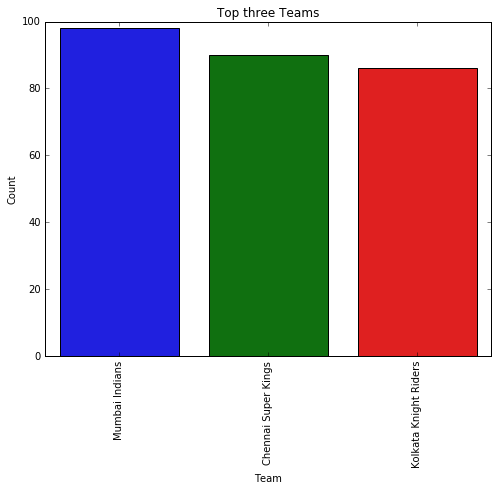

In [28]:
#ipl_mat_data_by_runs = ipl_mat_data[(ipl_mat_data['season'].between(2008,2018)) & ((ipl_mat_data['win_by_runs'] > 50) & (ipl_mat_data['win_by_runs'] < 100)) &
 #                          (ipl_mat_data['win_by_wickets'] == 0)]
#ipl_mat_data = ipl_mat_data[ipl_mat_data['win_by_runs']> 0]
#sns.countplot(x='win_by_runs', data=ipl_mat_data_by_runs).set_title('Count plot for win by runs.')
#ipl_mat_data_by_runs


#ipl_mat_data = ipl_mat_data[(ipl_mat_data['season'].between(2008,2018))]




# top 3 teams across the seasons
from collections import Counter
team_count = Counter(ipl_mat_data['winner'].dropna().tolist()).most_common(3)
team_idx = [team[0] for team in team_count]
team_val = [team[1] for team in team_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = team_idx,y=team_val ,ax =ax)
plt.title('Top three Teams')
plt.xlabel('Team')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)




<a id=section402></a>

### 4.2 Top 3 players across seasons ?

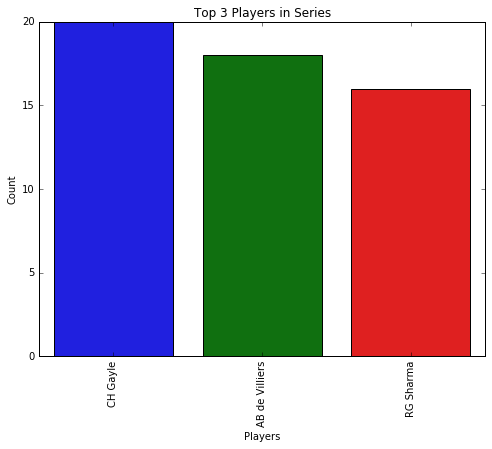

In [26]:
# top 3 players across the seasons

pom_count = Counter(ipl_mat_data['player_of_match'].dropna().tolist()).most_common(3)
pom_idx = [pom[0] for pom in pom_count]
pom_val = [pom[1] for pom in pom_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = pom_idx,y=pom_val ,ax =ax)
plt.title('Top 3 Players across season')
plt.xlabel('Players')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

<a id=section403></a>

### 4.3 Winning runs range with respect to toss decision ?

Text(0.5,1,'Winning Runs Range vs Toss Decision')

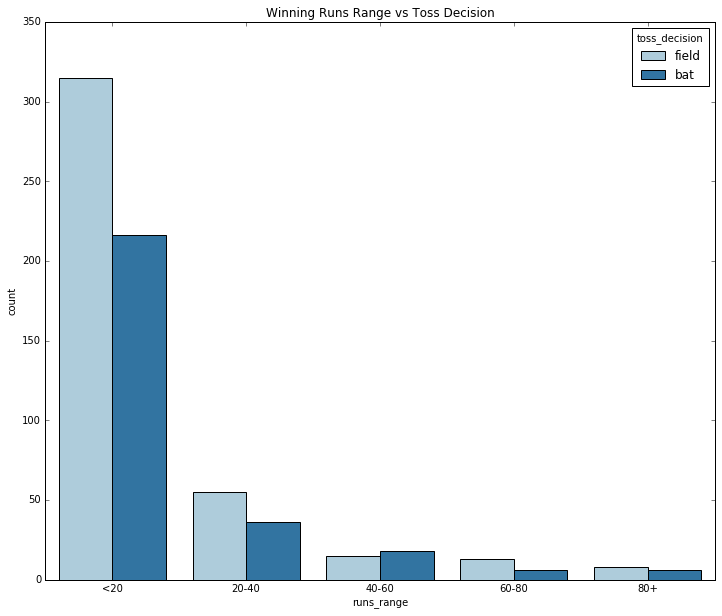

In [25]:
# winnng runs range wrt toss decision
ipl_mat_data['runs_range'] = pd.cut(ipl_mat_data['win_by_runs'].dropna(),
                         [0,20,40,60,80,100],
                         labels=['<20','20-40','40-60','60-80','80+'], include_lowest=True)

fig,ax =plt.subplots(figsize=(12,10))
sns.countplot(data = ipl_mat_data,x = 'runs_range', hue='toss_decision',palette="Paired")
plt.title('Winning Runs Range vs Toss Decision')

<a id=section404></a>

### 4.4 Winning runs range with respect to winners across seasons ?

Text(0.5,1,'Winning Runs Range for top 2 teams')

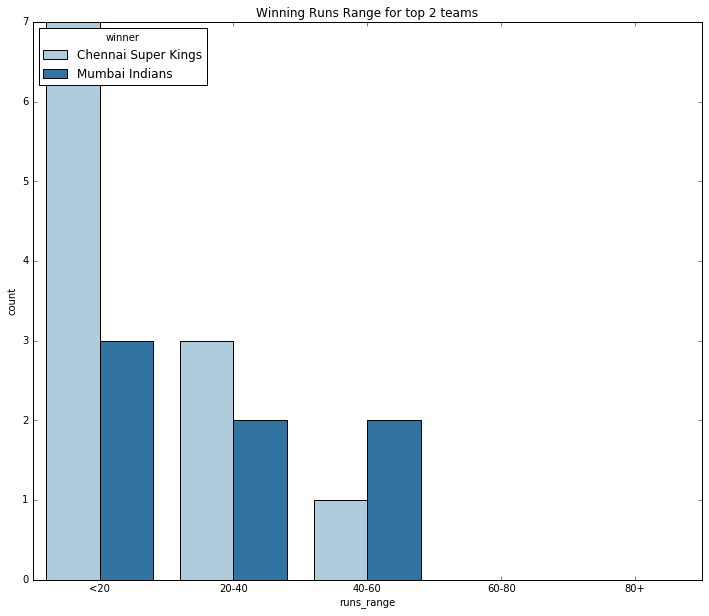

In [32]:
# winnng runs range wrt top2 winners across the seasons

ipl_mat_data_top2_winner_by_runs=ipl_mat_data[(ipl_mat_data['season'].between(2008,2018)) & ((ipl_mat_data['team1']=='Mumbai Indians') & (ipl_mat_data['team2']=='Chennai Super Kings')) 
                        | ((ipl_mat_data['team1']=='Chennai Super Kings') & (ipl_mat_data['team2']=='Mumbai Indians')) & ((ipl_mat_data['win_by_runs'] >=1) 
                        & (ipl_mat_data['win_by_wickets']==0))]

ipl_mat_data_top2_winner_by_runs['runs_range'] = pd.cut(ipl_mat_data_top2_winner_by_runs['win_by_runs'].dropna(),
                         [0,20,40,60,80,100],
                         labels=['<20','20-40','40-60','60-80','80+'], include_lowest=True)

fig,ax =plt.subplots(figsize=(12,10))
sns.countplot(data = ipl_mat_data_top2_winner_by_runs,x = 'runs_range', hue='winner',palette="Paired")
plt.title('Winning Runs Range for top 2 teams')

<a id=section405></a>

### 4.5 Winning matches by specific range of runs with respect to toss decision as batting across seasons ?

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

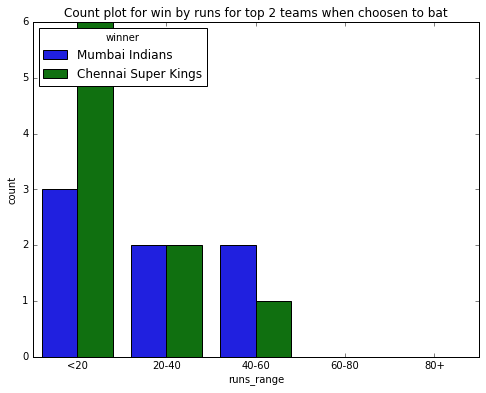

In [38]:
#frequency of winning matches by specific range of runs when toss decision was batting 


ipl_mat_data_winner_by_runs_toss_bat=ipl_mat_data[(ipl_mat_data['season'].between(2008,2018)) & ((ipl_mat_data['team1']=='Mumbai Indians') & (ipl_mat_data['team2']=='Chennai Super Kings')) 
                        | ((ipl_mat_data['team1']=='Chennai Super Kings') & (ipl_mat_data['team2']=='Mumbai Indians')) & ((ipl_mat_data['win_by_runs'] >=1) 
                        & (ipl_mat_data['win_by_wickets']==0)) & (ipl_mat_data['toss_decision'] == 'bat')]

ipl_mat_data_winner_by_runs_toss_bat['runs_range'] = pd.cut(ipl_mat_data_winner_by_runs_toss_bat['win_by_runs'].dropna(),
                         [0,20,40,60,80,100],
                         labels=['<20','20-40','40-60','60-80','80+'], include_lowest=True)


#toss_bat_by_runs = ipl_mat_data[(ipl_mat_data['season'].between(2008,2018)) & ((ipl_mat_data['win_by_runs'] > 20) & (ipl_mat_data['win_by_runs'] < 40)) & (ipl_mat_data['win_by_wickets'] == 0) & (ipl_mat_data['toss_decision'] == 'bat')]

#toss_bat_by_runs

#plt.figure(figsize=(8,4)) # this creates a figure 8 inch wide, 4 inch high
#sns.countplot(x="Column", data=ds)

#ax = sns.countplot(x="Column", data=ds)


#plt.tight_layout()

#f, ax = plt.subplots(figsize=(10, 3))
#sns.countplot(x='win_by_runs', data=ipl_mat_data_winner_by_runs_toss_bat).set_title('Count plot for win by runs for top 2 teams when choosen to bat.')


fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = ipl_mat_data_winner_by_runs_toss_bat,x = 'runs_range', hue='winner')
plt.title('Count plot for win by runs for top 2 teams when choosen to bat')
plt.style.available
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#plt.show()

<a id=section406></a>

### 4.6 Frequency of Winning matches by wickets across seasons ?

Text(0.5,1,'Count plot for win by wickets across seasons.')

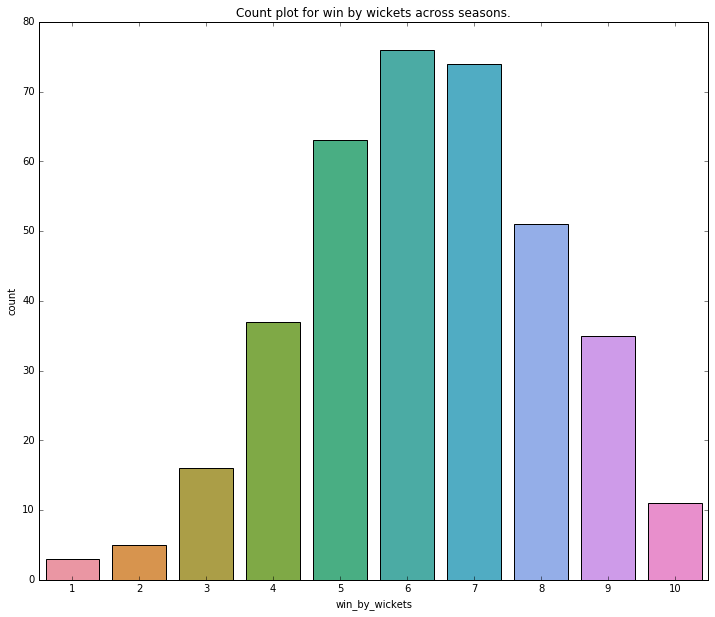

In [33]:
#frequency of winning matches by wickets across all seasons

ipl_mat_data_by_wickets = ipl_mat_data[(ipl_mat_data['season'].between(2008,2018)) & ((ipl_mat_data['win_by_wickets'] >= 1)) &
                           (ipl_mat_data['win_by_runs'] == 0)]
fig,ax =plt.subplots(figsize=(12,10))
sns.countplot(x='win_by_wickets', data=ipl_mat_data_by_wickets).set_title('Count plot for win by wickets across seasons.')


<a id=section407></a>

### 4.7 Winning matches by wickets with respect to toss decision as fielding across seasons ?

Text(0.5,1,'Count plot for win by wickets when choosen to field.')

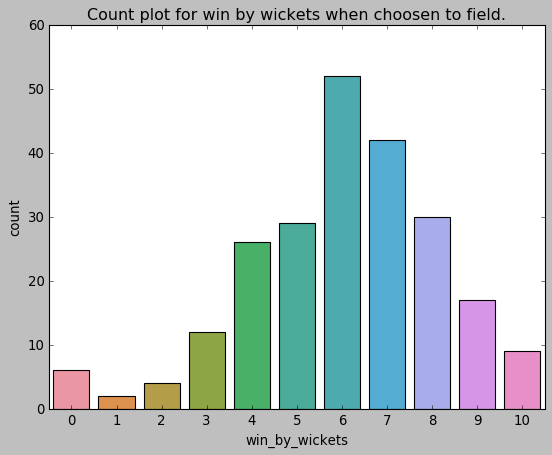

In [16]:
#frequency of winning matches by wickets when toss decision was fielding 
toss_field_by_wickets = ipl_mat_data[(ipl_mat_data['season'].between(2008,2018)) & (ipl_mat_data['win_by_wickets'] >= 0) &
                           (ipl_mat_data['win_by_runs'] == 0) & (ipl_mat_data['toss_decision'] == 'field')]

sns.countplot(x='win_by_wickets', data=toss_field_by_wickets).set_title('Count plot for win by wickets when choosen to field.')





<a id=section408></a>

### 4.8 Winning matches by wickets with respect to toss decision as fielding across seasons ?

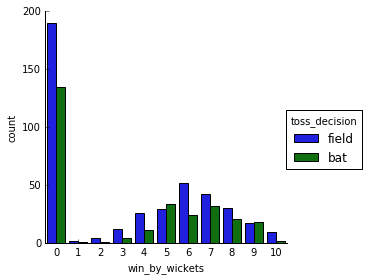

In [40]:
#comparison of win by wickets when choosen to bat or field

#fig,ax =plt.subplots(figsize=(12,10))
sns.factorplot('win_by_wickets', data=ipl_mat_data, hue='toss_decision', kind='count')


#sns.factorplot('GenderClass', hue='Survived', kind='count', data=titanic_data);
#plt.title('Factor plot for male female and child')

<a id=section409></a>

### 4.9 Winning matches by wickets with respect to top 2 winners ?

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

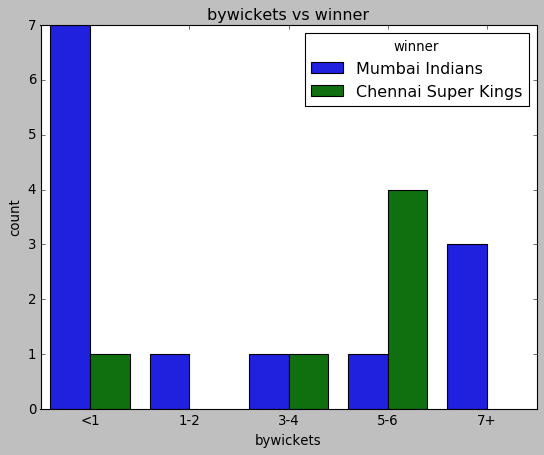

In [20]:
# win by wickets wrt winner

ipl_mat_data_winner_by_wickets=ipl_mat_data[(ipl_mat_data['season'].between(2008,2018)) & ((ipl_mat_data['team1']=='Mumbai Indians') & (ipl_mat_data['team2']=='Chennai Super Kings')) 
                        | ((ipl_mat_data['team1']=='Chennai Super Kings') & (ipl_mat_data['team2']=='Mumbai Indians')) & ((ipl_mat_data['win_by_runs'] ==0) 
                        & (ipl_mat_data['win_by_wickets']>=1))]

ipl_mat_data_winner_by_wickets

pd.set_option('display.max_columns', 100) 
ipl_mat_data_winner_by_wickets['bywickets'] = pd.cut(ipl_mat_data_winner_by_wickets['win_by_wickets'].dropna(),
                         [0,1,3,5,7,9],
                         labels=['<1','1-2','3-4','5-6','7+'], include_lowest=True)

fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = ipl_mat_data_winner_by_wickets,x = 'bywickets', hue='winner')
plt.title('bywickets vs winner')
plt.style.available


#plt.style.available


In [10]:
mat.style.use('classic')

Text(0.5,1,'Correlation between features')

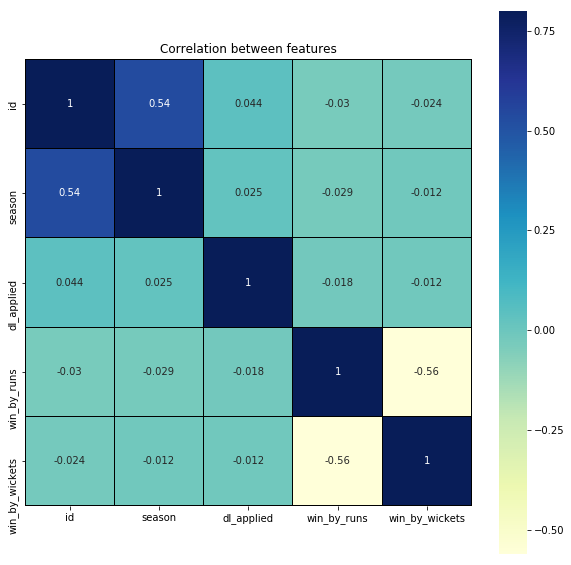

In [20]:
corr = ipl_mat_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

